In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import DataFrame
from pandas import Series
import seaborn as sns
import plotly.express as px
from numpy.random import seed
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Загрузим датасет:
ds1 = pd.read_excel(r"D:/мгту им Баумана/ВКР_Новикова_Е.Г/Norm/Norm.xlsx")
#Посмотрим на первые пять строк таблицы:
ds1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.289334,0.546433
1,1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.319758
2,2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.494123
3,3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.546433
4,4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.720799


In [38]:
#Удалим первый неинформативный столбец:
ds1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [39]:
# Посмотрим сова на первые 5 строк датасета:
ds1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.289334,0.546433
1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.319758
2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.494123
3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.546433
4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688,0,0.362355,0.720799


С целью прогноза модулей упругости (назовем эти модели с индексом u) при растяжении и прочности (назовем эти модели с индексом p) при растяжении было выбрано три метода анализа, подходящих для решения задачи регрессии: 
- метод К-ближайших соседей (K-Neighbors Regressor);
- случайный лес (Random Forest Regressor);
- деревo решений (Decision Tree Regressor).

По каждому прогнозу посчитаем и выведем метрики, используемые для оценки точности работы модели:

- среднюю квадратичную ошибку (MSE),  
- среднюю абсолютную ошибку (MAE), 

Выбирать наиболее удачные модели будем с помощью метрики MAE. Также определим точность работы моделей на тренировочных и тестовых выборках с помощью метрики Test score.

прогноз модуля упругости при растяжении

In [40]:
# Для создания модели потребуется разделение выборки на обучающую и тестовую:

x_trainu, x_testu, y_trainu, y_testu = train_test_split(
    ds1.loc[:, ds1.columns != 'Модуль упругости при растяжении, ГПа'],
    ds1[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

Проверим правильность разделения на тренировочную и тестовую выборку путем оценки размерности этих данных (по условию задания на тестовую выборку должно приходиться 30% данных) - видим, что данное условие выполняется

In [41]:
x_trainu.shape

(645, 12)

In [42]:
x_trainu

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.266219,0.643037,0.278232,0.234584,0.439240,0.321655,0.495611,0.578683,0.623998,1,0.571430,0.433990
650,0.178334,0.586130,0.463191,0.348338,0.616075,0.320131,0.204285,0.479890,0.391352,1,0.317517,0.537455
483,0.297796,0.532890,0.354250,0.758052,0.625457,0.716345,0.348479,0.569650,0.237919,1,0.554280,0.619605
355,0.590224,0.605695,0.692900,0.360136,0.654481,0.389632,0.456376,0.641999,0.392215,0,0.474980,0.306469
850,0.258455,0.170680,0.502517,0.470569,0.576124,0.477262,0.229392,0.436179,0.682036,1,0.623942,0.429910
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.803910,0.303772,0.201130,0.287544,0.329381,0.622672,0.026298,0.309596,0.576014,0,0.549851,0.495193
270,0.577452,0.777923,0.431133,0.526907,0.377453,0.646398,0.841346,0.486406,0.500515,0,0.584309,0.410964
860,0.359950,0.378127,0.731477,0.305836,0.655804,0.372042,0.227940,0.627286,0.590147,1,0.380169,0.529197
435,0.517953,0.781825,0.688797,0.467451,0.715422,0.431429,0.226518,0.456208,0.329278,0,0.050576,0.965176


In [43]:
x_testu.shape

(277, 12)

In [44]:
x_testu

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
319,0.325089,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.381499,0.622262,0,0.706867,0.419113
377,0.739697,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.605408,0.528535,0,0.536400,0.710983
538,0.230819,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.708160,0.347209,1,0.425178,0.579405
296,0.596552,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.438781,0.443355,0,0.741162,0.504853
531,0.635945,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.061865,0.307091,1,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.393855,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.854766,0.445939,0,0.401549,0.717647
133,0.287292,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.347529,0.672341,0,0.291997,0.552182
490,0.517037,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.503825,0.493243,1,0.804264,0.611119
558,0.435350,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.568094,0.135191,1,0.288131,0.309775


In [45]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_testu):
    return [np.mean(y_testu) for _ in range(len(y_testu))]
y_u_pred_mean = mean_model(y_testu)

Построение трех моделей при стандартных параметрах

Метод К-ближайших соседей (K-Neighbors Regressor) для прогноза модуля упругости при растяжении (knnu)

In [46]:
knnu = KNeighborsRegressor(n_neighbors=5)
#обучим данную модель:
knnu.fit(x_trainu, y_trainu)
#рассчитаем коэффициент детерминации:
y_pred_knnu = knnu.predict(x_testu)
mae_knnu = mean_absolute_error(y_pred_knnu, y_testu)
mse_knnu = mean_squared_error(y_testu, y_pred_knnu)
R2_knnu = r2_score(y_testu, y_pred_knnu)
R2_knnu_train = knnu.score(x_trainu, y_trainu)
# выведем полученные моделью метрики:
print('K Neighbors Regressor  Results:')
print('mae_knnu: ', round(mean_absolute_error(y_testu, y_pred_knnu)))
print('mse_knnu: {:.2f}'.format(mse_knnu))
print("R2_knnu на тестовой выборке: {:.2f}".format(r2_score(y_testu, y_pred_knnu)))
print("Test score_knnu на тренировочной выборке: {:.2f}".format(knnu.score(x_trainu, y_trainu)))

K Neighbors Regressor  Results:
mae_knnu:  0
mse_knnu: 0.05
R2_knnu на тестовой выборке: -0.22
Test score_knnu на тренировочной выборке: 0.18


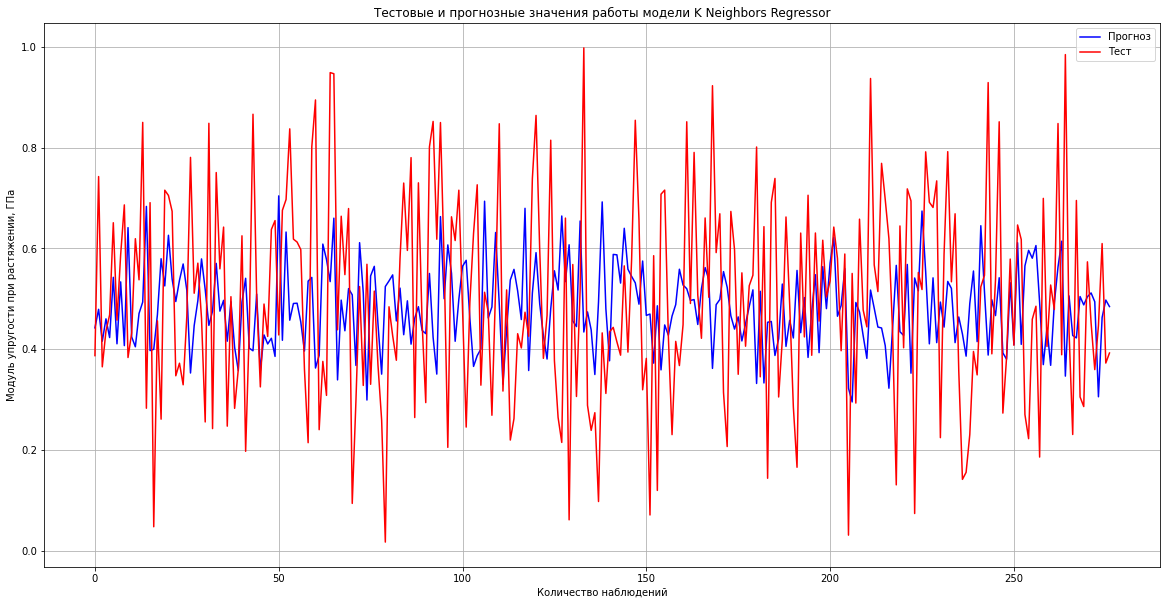

In [47]:
# Визуализируем полученные результаты работы модели K-Neighbors Regressor:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы модели K Neighbors Regressor")
plt.plot(y_pred_knnu, label = "Прогноз", color = 'blue')
plt.plot(y_testu.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Случайный лес (Random Forest Regressor ) для прогноза модуля упругости при растяжении (rfru)

In [48]:
rfru = RandomForestRegressor(n_estimators = 10,max_depth = 9, random_state = 42)
rfru.fit(x_trainu, y_trainu.values)
yu_pred_forest = rfru.predict(x_testu)
mae_rfru = mean_absolute_error(yu_pred_forest, y_testu)
mse_rfru = mean_squared_error(y_testu,yu_pred_forest)
R2_rfru = r2_score(y_testu, yu_pred_forest)
R2_rfru_train = rfru.score(x_trainu, y_trainu)
print('Random Forest Regressor Results:')
print('mae_rfru: ', round(mean_absolute_error(y_testu, yu_pred_forest)))
print('mse_rfru : {:.2f}'.format(mse_rfru))
print("R2_rfru на тестовой выборке: {:.2f}".format(r2_score(y_testu, yu_pred_forest)))
print("Test score_knnu на тренировочной выборке: {:.2f}".format(rfru.score(x_trainu, y_trainu)))

Random Forest Regressor Results:
mae_rfru:  0
mse_rfru : 0.04
R2_rfru на тестовой выборке: -0.07
Test score_knnu на тренировочной выборке: 0.53


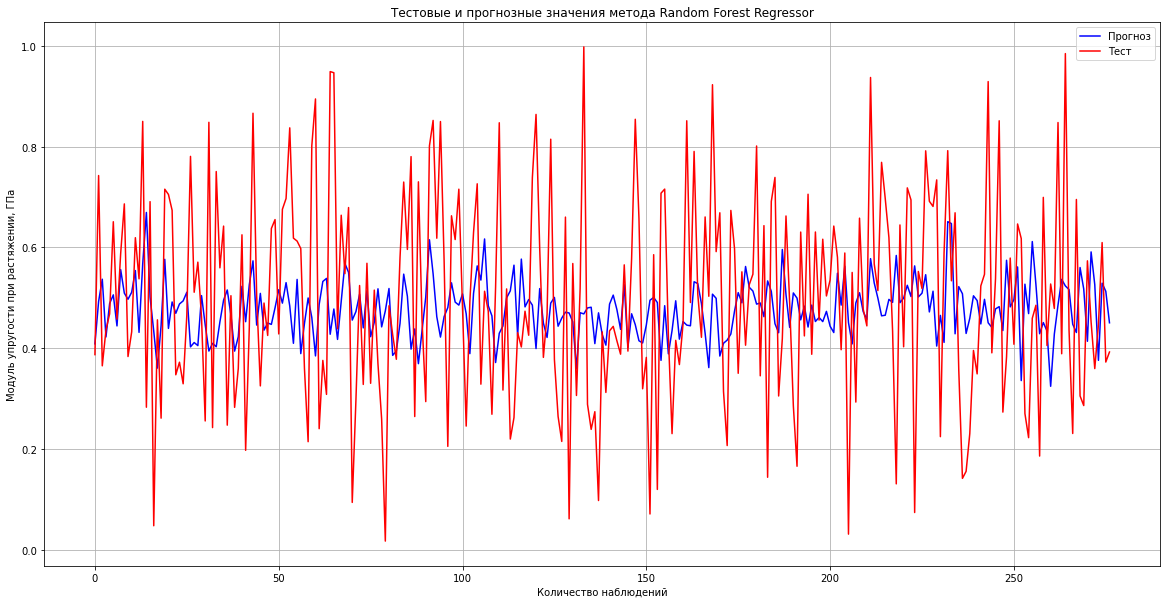

In [49]:
# Визуализируем полученные результаты работы модели Random Forest Regressor :
plt.figure(figsize=(20, 10))
plt.title("Тестовые и прогнозные значения метода Random Forest Regressor")
plt.plot(yu_pred_forest, label = "Прогноз", color = "blue")
plt.plot(y_testu.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Деревo решений (Decision Tree Regressor) для прогноза модуля упругости при растяжении (dtu)

In [50]:
dtu = DecisionTreeRegressor()
dtu.fit(x_trainu, y_trainu.values)
y_pred_dtu = dtu.predict(x_testu)
mae_dtu = mean_absolute_error(y_pred_dtu, y_testu)
mse_dtu = mean_squared_error(y_testu,y_pred_dtu)
R2_dtu = r2_score(y_testu, y_pred_dtu)
R2_dtu_train = dtu.score(x_trainu, y_trainu)
print('Decision Tree Regressor Results:')
print('mae_dtu: ', round(mean_absolute_error(y_testu, y_pred_dtu)))
print('mse_dtu: {:.2f}'.format(mse_dtu))
print("R2_dtu на тестовой выборке: {:.2f}".format(r2_score(y_testu, y_pred_dtu)))
print("Test score_knnu на тренировочной выборке: {:.2f}".format(dtu .score(x_trainu, y_trainu)))

Decision Tree Regressor Results:
mae_dtu:  0
mse_dtu: 0.09
R2_dtu на тестовой выборке: -1.22
Test score_knnu на тренировочной выборке: 1.00


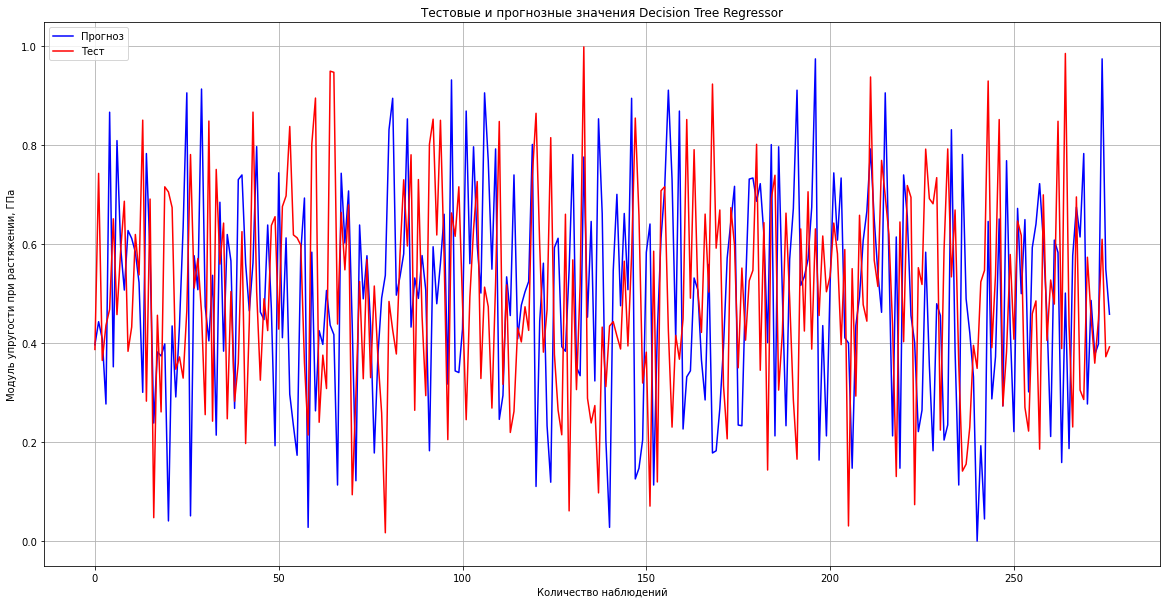

In [51]:
# Визуализируем полученные результаты работы модели Decision Tree Regressor :
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtu, label = "Прогноз", color = 'blue')
plt.plot(y_testu.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

Для проверки и выбора лучшей модели для прогноза модуля упругости при растяжении, в соответствии с условиями задачи проведем поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, где количество блоков равно 10. Оценивать будем с помощью коэффициента детерминации R2-score.

Поиск гиперпараметров модели K-Neighbors Regressor для прогноза модуля упругости при растяжении (cv = 10):

In [17]:
knnug = KNeighborsRegressor()
knnug_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
gsknnug = GridSearchCV(knnug, knnug_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gsknnug.fit(x_trainu, y_trainu)
knn_ug = gsknnug.best_estimator_
gsknnug.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 213, 'weights': 'uniform'}

In [18]:
# Гиперпараметры оптимальной модели:
print(gsknnug.best_estimator_)
gsknnug = gsknnug.best_estimator_
print(f'R2-score модели K-Neighbors Regressor для модуля упругости при растяжении: {gsknnug.score(x_testu, y_testu).round(3)}')

KNeighborsRegressor(n_neighbors=213)
R2-score модели K-Neighbors Regressor для модуля упругости при растяжении: -0.014


In [52]:
# Проверим полученные гиперпараметры в работе модели K-Neighbors Regressor:
knnug_grid = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 213, weights = 'uniform')
#Обучим эту модель:
knnug_grid.fit(x_trainu, y_trainu)
predictions_knnug_grid = knnug_grid.predict(x_testu)
#Оценим точность прогноза:
mae_knnug_grid = mean_absolute_error(predictions_knnug_grid, y_testu)
mse_knnug_grid = mean_squared_error(y_testu, predictions_knnug_grid)
R2_knnug_grid = r2_score(y_testu, predictions_knnug_grid)
R2_knnug_grid_train = knnug_grid.score(x_trainu, y_trainu)
print('KNeighborsRegressor Results:')
print('mae_knnug_grid: ', round(mean_absolute_error(predictions_knnug_grid, y_testu)))
print('mse_knnug_grid: {:.2f}'.format(mse_knnug_grid))
print("R2_knnug_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_knnug_grid)))
print("Test score_knnug_grid_train на тренировочной выборке: {:.2f}".format(knnug_grid.score(x_trainu, y_trainu)))

KNeighborsRegressor Results:
mae_knnug_grid:  0
mse_knnug_grid: 0.04
R2_knnug_grid на тестовой выборке: -0.01
Test score_knnug_grid_train на тренировочной выборке: 0.01


Поиск гиперпараметров модели Random Forest Regressor для прогноза модуля упругости при растяжении (cv = 10):

In [81]:
parametrs = { 'n_estimators': [100, 400],
              'max_depth': [10, 20],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grrfrug = GridSearchCV(estimator = rfru, param_grid  = parametrs, cv=10)
grrfrug.fit(x_trainu, y_trainu)
grrfrug.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [21]:
# Гиперпараметры оптимальной модели:
print(grrfrug.best_estimator_)
rfrug = grrfrug.best_estimator_
print(f'R2-score Random Forest Regressor для модуля упругости при растяжении: {rfru.score(x_testu, y_testu).round(3)}')

RandomForestRegressor(criterion='mse', max_depth=10, max_features='auto',
                      random_state=42)
R2-score Random Forest Regressor для модуля упругости при растяжении: -0.071


In [53]:
# Проверим полученные гиперпараметры в работе модели Random Forest Regressor :
rfrug_grid = RandomForestRegressor(n_estimators=400, criterion='mse', max_depth=9, max_features='auto', random_state=42)
#Обучим эту модель:
rfrug_grid.fit(x_trainu, y_trainu)
predictions_rfrug_grid = rfrug_grid.predict(x_testu)
#Оценим точность прогноза:
mae_rfrug_grid = mean_absolute_error(predictions_rfrug_grid, y_testu)
mse_rfrug_grid = mean_squared_error(y_testu, predictions_rfrug_grid)
R2_rfrug_grid = r2_score(y_testu, predictions_rfrug_grid)
R2_rfrug_grid_train = rfrug_grid.score(x_trainu, y_trainu)
# выведем полученные моделью c гиперпараметрами метрики:
print('RandomForestRegressor hyper Results:')
print('mae_rfrug_grid: ', round(mean_absolute_error(predictions_rfrug_grid, y_testu)))
print('mse_rfrug_grid : {:.2f}'.format(mse_rfrug_grid))
print("R2_rfrug_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_rfrug_grid)))
print("Test score_knnug_grid_train на тренировочной выборке: {:.2f}".format(rfrug_grid.score(x_trainu, y_trainu)))                                       

RandomForestRegressor hyper Results:
mae_rfrug_grid:  0
mse_rfrug_grid : 0.04
R2_rfrug_grid на тестовой выборке: -0.04
Test score_knnug_grid_train на тренировочной выборке: 0.57


Поиск гиперпараметров модели Decision Tree Regressor для прогноза модуля упругости при растяжении (cv = 10):

In [23]:
criteriondtru = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitterdtru = ['best', 'random']
max_depthdtru = [1, 5, 10, 15, 20]
min_samples_leafdtru = [100, 200, 300]
min_samples_splitdtru = [200, 300, 40]
max_featuresdtru = ['auto', 'sqrt', 'log2']
param_griddtru = {'criterion': criteriondtru,
               'splitter': splitterdtru,
               'max_depth': max_depthdtru,
               'min_samples_split': min_samples_splitdtru,
               'min_samples_leaf': min_samples_leafdtru,
               'max_features': max_featuresdtru}
gsdtru = GridSearchCV(dtu, param_griddtru, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gsdtru.fit(x_trainu, y_trainu)
dtr_dtru = gsdtru.best_estimator_
gsdtru.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'splitter': 'random'}

In [24]:
# Гиперпараметры оптимальной модели:
print(gsdtru.best_estimator_)
gsdtru = gsdtru.best_estimator_
print(f'R2-score Decision Tree Regressor для модуля упругости при растяжении: {gsdtru.score(x_testu, y_testu).round(3)}')
DecisionTreeRegressor(criterion='squared_error', max_depth=20,
                      max_features='sqrt', min_samples_leaf=100,
                      min_samples_split=40)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=100,
                      min_samples_split=300, splitter='random')
R2-score Decision Tree Regressor для модуля упругости при растяжении: -0.009


DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=100,
                      min_samples_split=40)

In [54]:
# Проверим полученные гиперпараметры в работе модели Decision Tree Regressor :
gsdtru_grid = DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=100,
                      min_samples_split=40)

#Обучим эту модель:
gsdtru_grid.fit(x_trainu, y_trainu)
predictions_gsdtru_grid = gsdtru_grid.predict(x_testu)

#Оценим точность прогноза:
mae_gsdtru_grid = mean_absolute_error(predictions_gsdtru_grid, y_testu)
mse_gsdtru_grid = mean_squared_error(y_testu, predictions_gsdtru_grid)
R2_gsdtru_grid = r2_score(y_testu, predictions_gsdtru_grid)
R2_gsdtru_grid_train = gsdtru_grid.score(x_trainu, y_trainu)
# выведем полученные моделью c гиперпараметрами метрики:
print('DecisionTreeRegressor hyper Results:')
print('mae_gsdtru_grid: ', round(mean_absolute_error(predictions_gsdtru_grid, y_testu)))
print('mse_gsdtru_grid : {:.2f}'.format(mse_gsdtru_grid))
print("R2_gsdtru_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_gsdtru_grid)))
print("Test score_gsdtru_grid_train на тренировочной выборке: {:.2f}".format(gsdtru_grid.score(x_trainu, y_trainu)))     

DecisionTreeRegressor hyper Results:
mae_gsdtru_grid:  0
mse_gsdtru_grid : 0.04
R2_gsdtru_grid на тестовой выборке: -0.00
Test score_gsdtru_grid_train на тренировочной выборке: 0.02


In [87]:
#сопоставим результаты работы трех моделей, прогнозирующих модуль упругости при растяжении:
dfu = {'Регрессор': ['KNeighbors', 'RandomForest', 'DecisionTree', 'KNeighborsRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor'], 'MAE': [mae_knnu, mae_rfru, mae_dtu, mae_knnug_grid, mae_rfrug_grid, mae_gsdtru_grid], 'MSE':[mse_knnu, mse_rfru, mse_dtu, mse_knnug_grid, mse_rfrug_grid, mse_gsdtru_grid], 'R2':[R2_knnu, R2_rfru, R2_dtu, R2_knnug_grid, R2_rfrug_grid, R2_gsdtru_grid], 'R2_train':[R2_knnu_train, R2_rfru_train, R2_dtu_train, R2_knnug_grid_train, R2_rfrug_grid_train, R2_gsdtru_grid_train]} 
dfu = pd.DataFrame(dfu)
dfu

,Регрессор,MAE,MSE,R2,R2_train
0,KNeighbors,0.183449,0.050883,-0.219121,0.182488
1,RandomForest,0.171868,0.044716,-0.071368,0.526752
2,DecisionTree,0.247619,0.092675,-1.220439,1.000000
3,KNeighborsRegressor,0.168217,0.042331,-0.014218,0.009954
4,RandomForestRegressor,0.169481,0.043328,-0.038117,0.568759
5,DecisionTreeRegressor,0.165675,0.041819,-0.001953,0.016387


прогноз прочности при растяжении - обучаем модели аналогично предедущей характеристике, только индексом вместо u будет p

In [59]:
# Для создания модели потребуется разделение выборки на обучающую и тестовую:

x_trainp, x_testp, y_trainp, y_testp = train_test_split(
    ds1.loc[:, ds1.columns != 'Модуль упругости при растяжении, ГПа'],
    ds1[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

Проверим правильность этого разделения на тренировочную и тестовую выборку путем оценки размерности этих данных (по условию задания на тестовую выборку должно приходиться 30% данных) - видим, что данное условие выполняется

In [60]:
x_trainp.shape

(645, 12)

In [61]:
x_trainp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.266219,0.643037,0.278232,0.234584,0.439240,0.321655,0.495611,0.578683,0.623998,1,0.571430,0.433990
650,0.178334,0.586130,0.463191,0.348338,0.616075,0.320131,0.204285,0.479890,0.391352,1,0.317517,0.537455
483,0.297796,0.532890,0.354250,0.758052,0.625457,0.716345,0.348479,0.569650,0.237919,1,0.554280,0.619605
355,0.590224,0.605695,0.692900,0.360136,0.654481,0.389632,0.456376,0.641999,0.392215,0,0.474980,0.306469
850,0.258455,0.170680,0.502517,0.470569,0.576124,0.477262,0.229392,0.436179,0.682036,1,0.623942,0.429910
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.803910,0.303772,0.201130,0.287544,0.329381,0.622672,0.026298,0.309596,0.576014,0,0.549851,0.495193
270,0.577452,0.777923,0.431133,0.526907,0.377453,0.646398,0.841346,0.486406,0.500515,0,0.584309,0.410964
860,0.359950,0.378127,0.731477,0.305836,0.655804,0.372042,0.227940,0.627286,0.590147,1,0.380169,0.529197
435,0.517953,0.781825,0.688797,0.467451,0.715422,0.431429,0.226518,0.456208,0.329278,0,0.050576,0.965176


In [62]:
x_testp.shape

(277, 12)

In [63]:
x_testp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
319,0.325089,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.381499,0.622262,0,0.706867,0.419113
377,0.739697,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.605408,0.528535,0,0.536400,0.710983
538,0.230819,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.708160,0.347209,1,0.425178,0.579405
296,0.596552,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.438781,0.443355,0,0.741162,0.504853
531,0.635945,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.061865,0.307091,1,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.393855,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.854766,0.445939,0,0.401549,0.717647
133,0.287292,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.347529,0.672341,0,0.291997,0.552182
490,0.517037,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.503825,0.493243,1,0.804264,0.611119
558,0.435350,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.568094,0.135191,1,0.288131,0.309775


In [64]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_testp):
    return [np.mean(y_testp) for _ in range(len(y_testp))]
y_p_pred_mean = mean_model(y_testp)

Метод К-ближайших соседей (K-Neighbors Regressor) для прогноза модуля прочности при растяжении (knnp)

In [68]:
knnp = KNeighborsRegressor(n_neighbors=5)
#обучим данную модель:
knnp.fit(x_trainp, y_trainp)
#рассчитаем метрики:
y_pred_knnp = knnp.predict(x_testp)
mae_knnp = mean_absolute_error(y_pred_knnp, y_testp)
mse_knnp = mean_squared_error(y_testp, y_pred_knnp)
R2_knnp = r2_score(y_testp, y_pred_knnp)
R2_knnp_train = knnu.score(x_trainp, y_trainp)
# выведем полученные моделью метрики:
print('K Neighbors Regressor  Results:')
print('mae_knnp: ', round(mean_absolute_error(y_testp, y_pred_knnp)))
print('mse_knnp: {:.2f}'.format(mse_knnp))
print("R2_knnp на тестовой выборке: {:.2f}".format(r2_score(y_testp, y_pred_knnp)))
print("Test score_knnp на тренировочной выборке: {:.2f}".format(knnp.score(x_trainp, y_trainp)))

K Neighbors Regressor  Results:
mae_knnp:  0
mse_knnp: 0.05
R2_knnp на тестовой выборке: -0.22
Test score_knnp на тренировочной выборке: 0.18


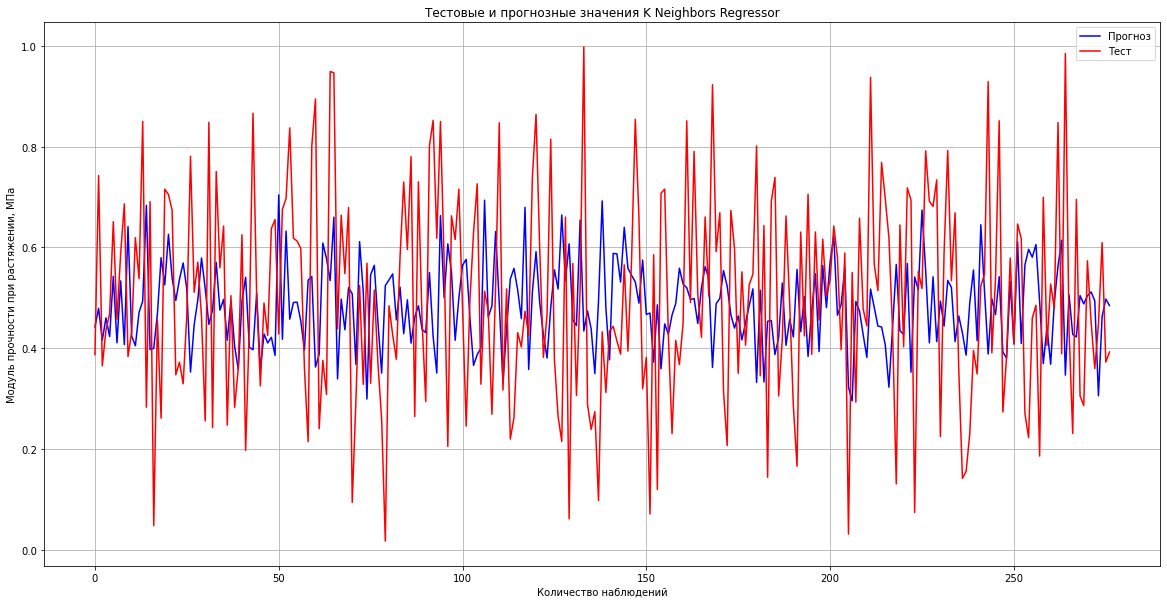

In [66]:
# Визуализируем полученные результаты работы модели K-Neighbors Regressor:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knnp, label = "Прогноз", color = 'blue')
plt.plot(y_testp.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении, МПа")
plt.legend()
plt.grid(True)

Случайный лес (Random Forest Regressor ) для прогноза модуля прочности при растяжении (rfrp)

In [74]:
rfrp = RandomForestRegressor(n_estimators = 10,max_depth = 9, random_state = 42)
rfrp.fit(x_trainp, y_trainp.values)
y_pred_rfrp = rfrp.predict(x_testp)
mae_rfrp = mean_absolute_error(y_pred_rfrp, y_testp)
mse_rfrp = mean_squared_error(y_testp, y_pred_rfrp)
R2_rfrp = r2_score(y_testp, y_pred_rfrp)
R2_rfrp_train = rfrp.score(x_trainp, y_trainp)

print('RandomForestRegressor  Results:')
print('mae_knnp: ', round(mean_absolute_error(y_testp, y_pred_rfrp)))
print('mse_knnp: {:.2f}'.format(mse_rfrp))
print("R2_knnp на тестовой выборке: {:.2f}".format(r2_score(y_testp, y_pred_rfrp)))
print("Test score_knnp на тренировочной выборке: {:.2f}".format(rfrp.score(x_trainp, y_trainp)))

RandomForestRegressor  Results:
mae_knnp:  0
mse_knnp: 0.04
R2_knnp на тестовой выборке: -0.07
Test score_knnp на тренировочной выборке: 0.53


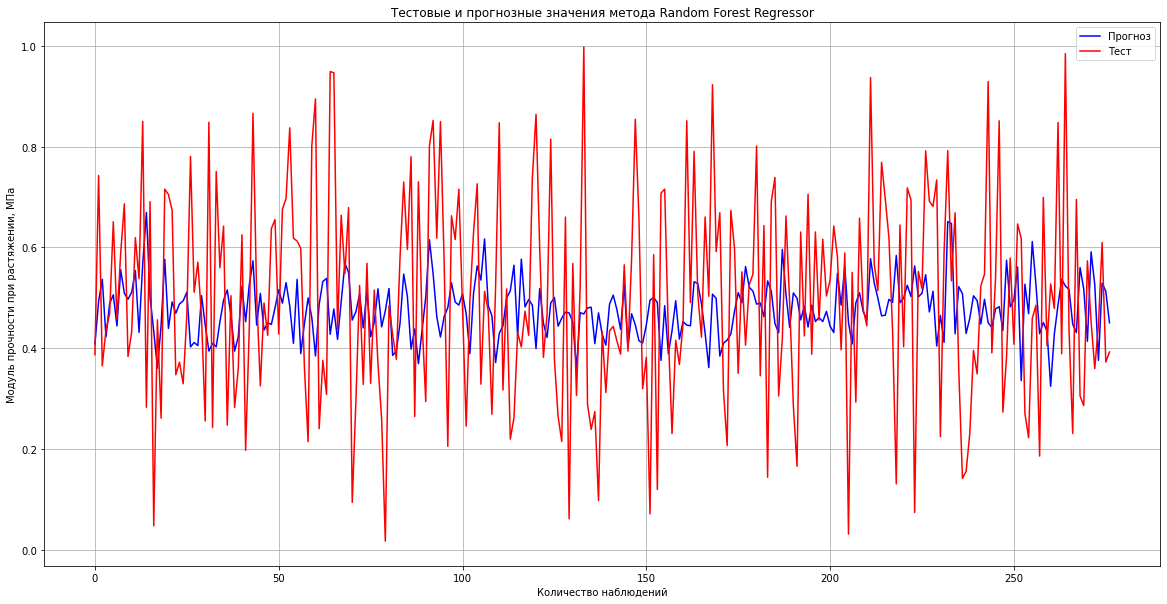

In [75]:
# Визуализируем полученные результаты работы модели Random Forest Regressor :
plt.figure(figsize=(20, 10))
plt.title("Тестовые и прогнозные значения метода Random Forest Regressor")
plt.plot(y_pred_rfrp, label = "Прогноз", color = "blue")
plt.plot(y_testp.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении, МПа")
plt.legend()
plt.grid(True)

Деревo решений (Decision Tree Regressor) для прогноза модуля прочности при растяжении (dtp)

In [85]:
dtp = DecisionTreeRegressor()
dtp.fit(x_trainp, y_trainp.values)
y_pred_dtp = dtp.predict(x_testp)
mae_dtp = mean_absolute_error(y_pred_dtp, y_testp)
mse_dtp = mean_squared_error(y_testp,y_pred_dtp)
R2_dtp = r2_score(y_testp, y_pred_dtp)
R2_dtp_train = dtp.score(x_trainp, y_trainp)
print('Decision Tree Regressor Results:')
print('mae_dtp: ', round(mean_absolute_error(y_testp, y_pred_dtp)))
print('mse_dtp: {:.2f}'.format(mse_dtp))
print("Test score на тестовой выборке: {:.2f}".format(dtp.score(x_testp, y_testp)))
print("Test score_knnp на тренировочной выборке: {:.2f}".format(dtp.score(x_trainp, y_trainp)))

Decision Tree Regressor Results:
mae_dtp:  0
mse_dtp: 0.09
Test score на тестовой выборке: -1.17
Test score_knnp на тренировочной выборке: 1.00


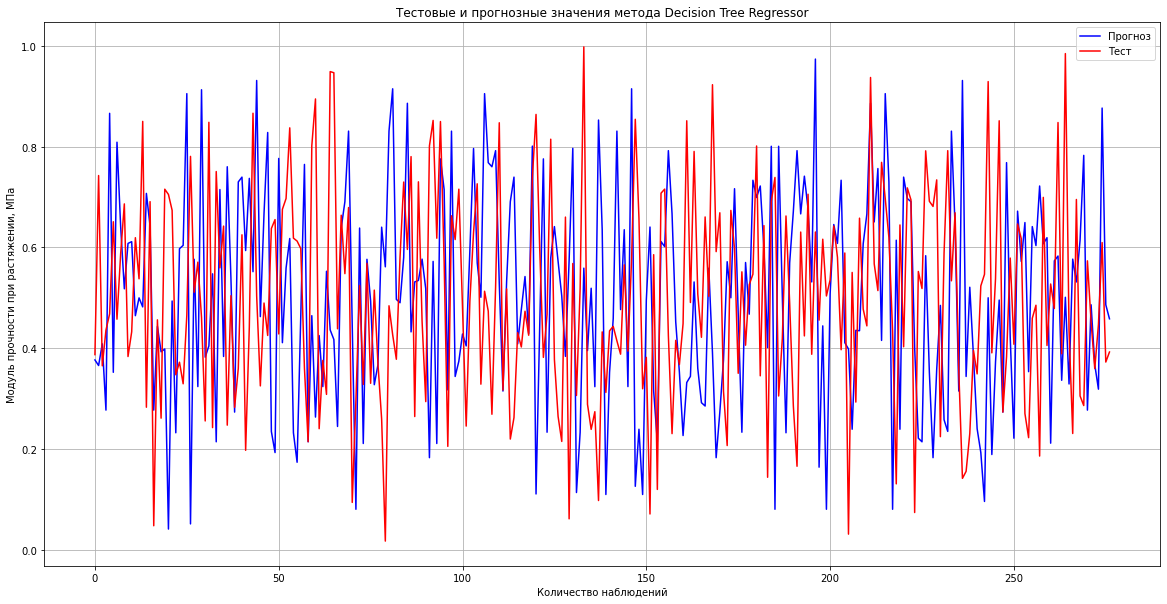

In [78]:
# Визуализируем полученные результаты работы модели Decision Tree Regressor:
plt.figure(figsize=(20, 10))
plt.title("Тестовые и прогнозные значения метода Decision Tree Regressor")
plt.plot(y_pred_dtp, label = "Прогноз", color = "blue")
plt.plot(y_testp.values, label = "Тест", color = 'red')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль прочности при растяжении, МПа")
plt.legend()
plt.grid(True)

Для проверки и выбора лучшей модели для прогноза модуля прочности при растяжении, в соответствии с условиями задачи проведем поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, где количество блоков равно 10. Оценивать будем с помощью коэффициента детерминации R2-score.

Поиск гиперпараметров модели K-Neighbors Regressor для прогноза модуля прочности при растяжении (cv = 10):

In [79]:
knnp = KNeighborsRegressor()
knnp_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
gsknnp = GridSearchCV(knnp, knnp_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gsknnp.fit(x_trainp, y_trainp)
knn_p = gsknnp.best_estimator_
gsknnp.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 213, 'weights': 'uniform'}

In [80]:
# Гиперпараметры оптимальной модели:
print(gsknnp.best_estimator_)
gsknnp = gsknnp.best_estimator_
print(f'R2-score модели KNeighborsRegressor для модуля прочности при растяжении: {gsknnp.score(x_testp, y_testp).round(3)}')

KNeighborsRegressor(n_neighbors=213)
R2-score модели KNeighborsRegressor для модуля прочности при растяжении: -0.014


In [81]:
# Проверим полученные гиперпараметры в работе модели K-Neighbors Regressor:
knnp_grid = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 213, weights = 'uniform')
#Обучим эту модель:
knnp_grid.fit(x_trainp, y_trainp)
predictions_knnp_grid = knnp_grid.predict(x_testp)

#Оценим точность прогноза:
mae_knnp_grid = mean_absolute_error(predictions_knnp_grid, y_testu)
mse_knnp_grid = mean_squared_error(y_testu, predictions_knnp_grid)
R2_knnp_grid = r2_score(y_testu, predictions_knnp_grid)
R2_knnp_grid_train = knnp_grid.score(x_trainp, y_trainp)

# выведем полученные моделью c гиперпараметрами метрики:
print('K Neighbors Regressor hyper Results:')
print('mae_knnp_grid: ', round(mean_absolute_error(predictions_knnp_grid, y_testu)))
print('mse_knnp_grid : {:.2f}'.format(mse_knnp_grid))
print("R2_gsdtru_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_knnp_grid)))
print("Test score_knnp_grid_train на тренировочной выборке: {:.2f}".format(knnp_grid.score(x_trainp, y_trainp)))

K Neighbors Regressor hyper Results:
mae_knnp_grid:  0
mse_knnp_grid : 0.04
R2_gsdtru_grid на тестовой выборке: -0.01
Test score_knnp_grid_train на тренировочной выборке: 0.01


Поиск гиперпараметров модели Random Forest Regressor для прогноза модуля прочности при растяжении (cv = 10):

In [ ]:
parametrs = { 'n_estimators': [50, 300],
              'max_depth': [5, 30],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grrfrp = GridSearchCV(estimator = rfrp, param_grid  = parametrs, cv=10)
grrfrp.fit(x_trainp, y_trainp)
grrfrp.best_params_

In [ ]:
# Гиперпараметры оптимальной модели:
print(grrfrp.best_estimator_)
rfrug = grrfrp.best_estimator_
print(f'R2-score RandomForestRegressor для модуля прочности при растяжении: {rfrp.score(x_testp, y_testp).round(3)}')

In [82]:
# Проверим полученные гиперпараметры в работе модели Random Forest Regressor :
rfrp_grid = RandomForestRegressor(n_estimators=300, criterion='mse', max_depth=5, max_features='auto', random_state=42)
#Обучим эту модель:
rfrp_grid.fit(x_trainp, y_trainp)
predictions_rfrp_grid = rfrp_grid.predict(x_testp)

#Оценим точность прогноза:
mae_rfrp_grid = mean_absolute_error(predictions_rfrp_grid, y_testu)
mse_rfrp_grid = mean_squared_error(y_testu, predictions_rfrp_grid)
R2_rfrp_grid = r2_score(y_testu, predictions_rfrp_grid)
R2_rfrp_grid_train = rfrp_grid.score(x_trainp, y_trainp)

# выведем полученные моделью c гиперпараметрами метрики:
print('RandomForestRegressor hyper Results:')
print('mae_rfrp_grid: ', round(mean_absolute_error(predictions_rfrp_grid, y_testu)))
print('mse_rfrp_grid : {:.2f}'.format(mse_rfrp_grid))
print("R2_rfrp_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_rfrp_grid)))
print("Test score_rfrp_grid_train на тренировочной выборке: {:.2f}".format(rfrp_grid.score(x_trainp, y_trainp)))

RandomForestRegressor hyper Results:
mae_rfrp_grid:  0
mse_rfrp_grid : 0.04
R2_rfrp_grid на тестовой выборке: -0.02
Test score_rfrp_grid_train на тренировочной выборке: 0.25


Поиск гиперпараметров модели Decision Tree Regressor для прогноза модуля прочности при растяжении (cv = 10):

In [ ]:
criteriondtp = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitterdtp = ['best', 'random']
max_depthdtp = [1, 4, 7, 10, 13]
min_samples_leafdtp = [50, 150, 200]
min_samples_splitdtp = [100, 200, 300]
max_featuresdtp = ['auto', 'sqrt', 'log2']
param_griddtp = {'criterion': criteriondtp,
               'splitter': splitterdtp,
               'max_depth': max_depthdtp,
               'min_samples_split': min_samples_splitdtp,
               'min_samples_leaf': min_samples_leafdtp,
               'max_features': max_featuresdtp}
gsdtp = GridSearchCV(dtp, param_griddtp, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gsdtp.fit(x_trainp, y_trainp)
dtp_dtp = gsdtp.best_estimator_
gsdtp.best_params_

In [ ]:
# Гиперпараметры оптимальной модели:
print(gsdtp.best_estimator_)
gsdtp = gsdtp.best_estimator_
print(f'R2-score DecisionTreeRegressor для модуля прочности при растяжении: {gsdtp.score(x_testu, y_testu).round(3)}')
DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      max_features='log2', min_samples_leaf=50,
                      min_samples_split=300)

In [83]:
# Проверим полученные гиперпараметры в работе модели Decision Tree Regressor :
gsdtp_grid = DecisionTreeRegressor(max_depth=1, max_features='log2', min_samples_leaf=50,
                      min_samples_split=300)

#Обучим эту модель:
gsdtp_grid.fit(x_trainp, y_trainp)
predictions_gsdtp_grid = gsdtp_grid.predict(x_testp)
#Оценим точность прогноза:
mae_gsdtp_grid = mean_absolute_error(predictions_gsdtp_grid, y_testu)
mse_gsdtp_grid = mean_squared_error(y_testu, predictions_gsdtp_grid)
R2_gsdtp_grid = r2_score(y_testu, predictions_gsdtp_grid)
R2_gsdtp_grid_train = gsdtp_grid.score(x_trainp, y_trainp)

# выведем полученные моделью c гиперпараметрами метрики:
print('DecisionTreeRegressor hyper Results:')
print('mae_gsdtp_grid: ', round(mean_absolute_error(predictions_gsdtp_grid, y_testu)))
print('mse_gsdtp_grid : {:.2f}'.format(mse_gsdtp_grid))
print("R2_gsdtp_grid на тестовой выборке: {:.2f}".format(r2_score(y_testu, predictions_gsdtp_grid)))
print("Test score_gsdtp_grid_train на тренировочной выборке: {:.2f}".format(gsdtp_grid.score(x_trainp, y_trainp)))

DecisionTreeRegressor hyper Results:
mae_gsdtp_grid:  0
mse_gsdtp_grid : 0.04
R2_gsdtp_grid на тестовой выборке: -0.02
Test score_gsdtp_grid_train на тренировочной выборке: 0.00


In [88]:
#сопоставим результаты работы трех моделей:
dfp = {'Регрессор': ['KNeighbors', 'RandomForest', 'DecisionTree', 'KNeighborsRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor'], 'MAE': [mae_knnp, mae_rfrp, mae_dtp, mae_knnp_grid, mae_rfrp_grid, mae_gsdtp_grid], 'MSE':[mse_knnp, mse_rfrp, mse_dtp, mse_knnp_grid, mse_rfrp_grid, mse_gsdtp_grid], 'R2':[R2_knnp, R2_rfrp, R2_dtp, R2_knnp_grid, R2_rfrp_grid, R2_gsdtp_grid], 'R2_train':[R2_knnp_train, R2_rfrp_train, R2_dtp_train, R2_knnp_grid_train, R2_rfrp_grid_train, R2_gsdtp_grid_train]} 
dfp = pd.DataFrame(dfp)
dfp

,Регрессор,MAE,MSE,R2,R2_train
0,KNeighbors,0.183449,0.050883,-0.219121,0.182488
1,RandomForest,0.171868,0.044716,-0.071368,1.000000
2,DecisionTree,0.247132,0.090726,-1.173738,1.000000
3,KNeighborsRegressor,0.168217,0.042331,-0.014218,0.009954
4,RandomForestRegressor,0.167851,0.042488,-0.017993,0.253002
5,DecisionTreeRegressor,0.168035,0.042526,-0.018890,0.004651


Таким образом, при обучении лучше всего себя показали модели дерева решения, а при прогнозе -DecisionTreeRegressor с гиперпараметрами